In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

from sklearn.preprocessing import PowerTransformer

In [2]:
np.set_printoptions(precision=4)
pd.set_option('display.precision', 4)
pd.set_option('display.max_columns', 30)

In [3]:
data = pd.read_csv('corr.csv', index_col=0)

In [4]:
pt = PowerTransformer()
data_transformed = pt.fit_transform(data.values)
pt.lambdas_

array([-26.0387, -28.412 , -26.7936, -25.5572, -27.8763, -28.504 ,
       -28.4123,  -3.5206,  -1.3123,  -1.1954,  -1.8224,  -2.2044,
        -1.843 ,  -1.6415, -28.318 , -26.7084, -23.9096, -26.7766,
       -30.0824, -25.8542, -28.5299, -26.1721,  -5.5564,  -5.9486,
        -8.4179,  -6.7008,  -7.5379,  -8.6759,  -8.5257])

In [5]:
data_transformed = pd.DataFrame(data_transformed)

In [6]:
data_ = data_transformed.copy()
data_.shape

(29, 29)

In [7]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [8]:
from consensus_clustering_parallelised import ConsensusClustering

In [9]:
cc = ConsensusClustering(K_range=range(4, 15),
                         random_state=23,
                         n_iterations=30,
                         plot_cdf=True,
                         n_jobs=3,
                         parallelization_method='multiprocessing')

KMeans is set as default clusterer


Consensus clustering with 14 clusters: 100%|██████████████████████████████████████████| 30/30 [00:00<00:00, 508.45it/s]


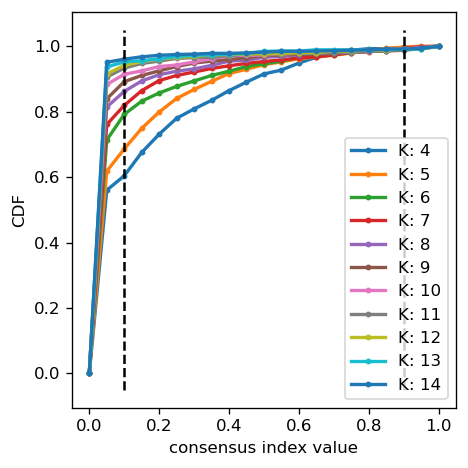

In [10]:
cc.fit(data_.values)

In [11]:
[(k, v['pac_area']) for k, v in cc.cdf_at_K_data.items()]

[(4, 0.3888228373174899),
 (5, 0.30796670391005654),
 (6, 0.19738406605585745),
 (7, 0.17003566925010605),
 (8, 0.12485136803989183),
 (9, 0.09393578780179701),
 (10, 0.07609987737307844),
 (11, 0.0535077286284007),
 (12, 0.04756242426624058),
 (13, 0.03804994285036212),
 (14, 0.030915576517229426)]

In [12]:
ccg = ConsensusClustering(clusterer=GaussianMixture(n_init=2),
                          K_range=range(5, 9),
                          random_state=23,
                          n_iterations=30,
                          plot_cdf=True,
                          n_jobs=2,
                          parallelization_method='multiprocessing')

Consensus clustering with 8 clusters: 100%|███████████████████████████████████████████| 30/30 [00:00<00:00, 179.64it/s]


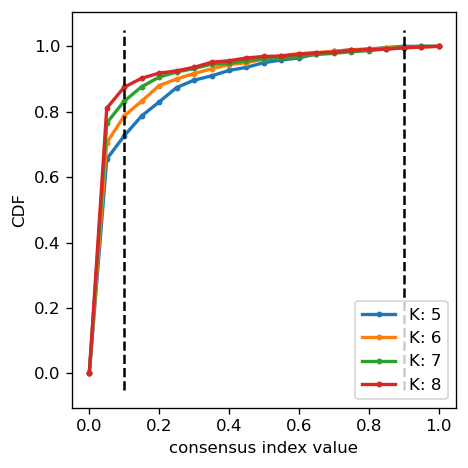

In [13]:
ccg.fit(data_.values)

In [14]:
[(k, v['pac_area']) for k, v in ccg.cdf_at_K_data.items()]

[(5, 0.26991676938734266),
 (6, 0.20689654871202257),
 (7, 0.15933413029285104),
 (8, 0.11652794611440698)]